# 6 – Statistic Tests and 🚀 Project

* * * 

### Icons used in this notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💭 **Reflection**: Helping you think about programming.<br>
⚠️ **Warning**: Heads-up about tricky stuff or common mistakes.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Learning Objectives
1. [Doing Statistic Tests using `statsmodels`](#stats)
2. [🚀 Project](#project)

<a id='stats'></a>

# Doing Statistic Tests using `statsmodels`

What if we want to perform regression or statistical tests on our data? `statsmodels` is a package that is useful for statistical analysis in Python. We will introduce two basic statistical methods available through `statsmodels` using the Gapminder dataset we have been using in the previous notebook. 

⚠️ **Warning**: `statsmodels` is designed to use with numerical data. If you want to use categorical variables in a model, you will often need to convert those variables from strings to numbers.

💡 **Tip**: If you see an `ImportError` when trying to import statsmodels below, **uncomment** the line in the next cell that says `!pip install statsmodels`. This will install the library. 

In [ ]:
# Install statsmodels if necessary
#!pip install statsmodels 

In [29]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Load in our gapminder data
df = pd.read_csv('../../../data/gapminder-FiveYearData.csv')

In [4]:
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


## Performing a t-test

A t-test is a test of the significance of the difference between two distributions. Let's look if there's a significant difference between the life expectancy of African and European countries. 

We proceed as follows:

1. Subset to the appropriate rows and column using `df.loc[]`.
2. Run the `ttest_ind` function, which takes two arguments, one for each series. 
3. Interpret the output. 

In [5]:
africa = df.loc[df['continent'] == 'Africa', ['lifeExp']]
europe = df.loc[df['continent'] == 'Europe', ['lifeExp']]

🔔 **Question**: What does each of the outputs correspond to? What is the type of the output?

In [6]:
res = sm.stats.ttest_ind(africa, europe)
res

(array([-43.54269082]), array([1.62877328e-231]), 982.0)

In [7]:
print('t-score:', res[0])
print('p-value:', res[1])
print('Degrees of Freedom:', res[2])

t-score: [-43.54269082]
p-value: [1.62877328e-231]
Degrees of Freedom: 982.0


The t-score is a ratio between the difference **between** two groups and the difference **within** the groups.

- Larger t-score = more difference between groups.
- Smaller t-score = more similarity between groups.
- Our t-score of -44 tells us that Europe and Africa are 44 times as different from each other as they are within each other. 

These and other statistical tests can be found in the [documentation](https://www.statsmodels.org/dev/api.html). 

## Performing Linear Regression

Regression is another useful part of the `statsmodels` package and a common statistical test to apply. We will work through an example with Ordinary Least Squares (OLS) regression, using `sm.OLS()`.

For our Gapminder data, let's see whether year helps to predict life expectancy.

First, let's create a violin plot using `seaborn` to check the distribution of life expectancy per year.

<AxesSubplot:xlabel='year', ylabel='lifeExp'>

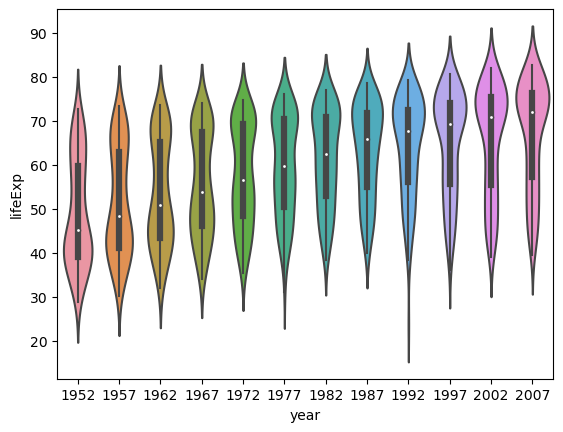

In [30]:
sns.violinplot(x='year', y='lifeExp', data=df)

That looks like there's a linear relationship: the life expectancy seems to increase over time.


Now let's use `statsmodels` to create a regression function, which takes two inputs: 
- A matrix $X$ with the input variables (one or more columns). In this case, it will just contain the "year" column.
- An array $y$ with the output variable (single column). In this case, it will be the "lifeExp" column.

In this case, we can make `X` and `y` by simply selecting the appropriate columns.

In [23]:
# Set up X and y
X = df['year']
y = df['lifeExp']

The model is set up using `sm.OLS(y, X)` which tells which data to use in the model. The `.fit()` method generates the fitted model, which is then saved to `results`. 

🔔 **Question**:  What happens when you print the `result` variable?

In [24]:
result = sm.OLS(y, X).fit()
result

`result` is actually an object containing the output of the model. This can then be used to make predictions, visualizations, etc. The`.summary()` method that gives a good overview of each coefficient and overall statistical properties of the model. Let's print the summary for this model.

In [25]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          3.743e+04
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:39:51   Log-Likelihood:                         -6748.2
No. Observations:                1704   AIC:                                  1.350e+04
Df Residuals:                    1703   BIC:                                  1.350e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

🔔 **Question**: Is this model good at predicting life expectancy? How many variables are significant? If you were to improve this model, what would you add/remove/change?

## 🥊 Challenge: Multiple Linear Regression

Let's practice with some more `statsmodels` functions. Let's modify the regression above to include other columns.

1. For our X, include multiple numeric columns.
2. Fit and run a multiple linear regression on the data. 
4. Interpret the model. What does the model say now?

In [33]:
# YOUR CODE HERE

X = df[['year','gdpPercap']]
y = df['lifeExp']
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          2.876e+04
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:46:02   Log-Likelihood:                         -6394.8
No. Observations:                1704   AIC:                                  1.279e+04
Df Residuals:                    1702   BIC:                                  1.280e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 🚀 Project

* Time: 30 minutes.
* The helper will be in a **breakout room**: Join them if you want to work there, or ask questions about the code!
* The instructor will stay in the **main room**: Feel free to ask questions here as well.

### Data: Airline Tweets
In this section, we will go through an example analysis of tweets about airlines. We will bring together the basic programming, loading data, and statistical analysis/visualization techniques from this workshop to analyze airline tweets. 

First, let's import the packages to use in this analysis:

In [28]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm

## 1. Getting the data

Before we can get our data, you should know something more about **filepaths**. 

A filepath is the location of a file on your system. There are two kinds of filepaths:

* **absolute**: The filepath from the top level directory (or folder).
    * For Macs, these begin with a forward slash, followed by folders separated by a **forward slash**. E.g. `/Users/[USERNAME]/directory/subdirectory/file`.
    * For Windows, these begin with a backward slash or, more commonly, a volume, e.g. `C:\Documents\directory\subdirectory\file`. Note the **backward slash** to separate folders.
* **relative**: The filepath relative to the current working directory (i.e. notebook location). Common locations include:
    * File in same folder: `./file` or `file` (`.` means 'here').
    * Subfolder: `subfolder/file`.
    * Higher folder: `../sisterfolder/file` (`..` means 'go up one level in the directory').

When you are figuring out what filepath to use, you can use `os.listdir([PATH])` to list all subdirectories in a path. For example, let's see what directories are available to us in the current folder (noted with a dot `.`).

🔔 **Question**: In this current folder we're checking out, which items are folders and which are files? (**Hint:** You can double check by looking at the files in JupyterLab/ Jupyter Notebook).

In [1]:
import os
os.listdir('.')

['6_Project',
 '.DS_Store',
 '4_Control_Flow_and_Functions.ipynb',
 '5_Data_Analysis',
 '5_Data_Analysis.ipynb',
 '.ipynb_checkpoints',
 '6_Project.ipynb']

Looking up the items in the folder after moving up one level works like this:

In [2]:
os.listdir('../')

['Fundamentals-II', '.DS_Store', 'Fundamentals-I', '.ipynb_checkpoints']

### 1.1 Our Dataset: Airline Tweets

The dataset we will use is from the [Airline tweets sentiment dataset](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download), which contains tweets that tag one of several major airlines. The dataset also includes information about the tweet location and time, the airline mentioned, and the sentiment of the tweet.

There are several files in the "airline" subfolder of the "data" folder in our Python Fundamentals repository. 

🔔 **Question**: Use the File Browser to the left of your screen. Can you find the "airline" folder?

### 1.2 Import Data

Use `os.listdir()` to see the files in the "airlines" folder. 

💡 **Tip**: Remember how to move up in the folder structure? `../../` goes up two folders!

In [37]:
# YOUR CODE HERE
os.listdir('../../data/airline_data')

['Delta.csv',
 'United.csv',
 'Southwest.csv',
 'US-Airways.csv',
 'Virgin-America.csv',
 'README.txt',
 'American.csv']

### 1.3 Load in a Single File

First, let's load in a single file and take a look at it. 

1. Read in the `Delta.csv` file as a `pandas` object.
2. How many rows are there? How many columns?
3. Which columns seem most informative? Are there any extra or redundant columns? 
4. Where is airline represented in the csv file?

In [1]:
import pandas as pd

# Load in file for Delta
single_airline = pd.read_csv('../../data/airline_data/Delta.csv')

It turns out that the airline column is not present in any column, but is in the title of the csv file. Let's extract that information and add it to the DataFrame in a column called `airline`. 

In [24]:
# Example: extracting filename from path
filename = 'airline_data/Delta.csv'.split('/')[1] 
print(filename)

# Splitting the filename again to get rid of '.csv'
filename_short = filename.split('.')[0] 
print(filename_short)

# Fill in the blanks
single_airline['airline'] = filename_short

Delta.csv
Delta


Let's create a function for this. We call it `process_file()`. It takes in a filepath in an argument called `filepath`, and it returns the dataframe with the airline column added. 

Use the example above to set `name` variable to the split of the filepath so that the airline column includes the name of the airline.

In [25]:
def process_file(filepath):
    df = pd.read_csv(filepath)
    # Add code to extract airline name and save it to a name variable
    filename_short = filepath.split('/')[-1].split('.')[0]
    df['airline'] = filename_short
    return(df)

🔔 **Question**: Here's another filepath: `'data/US-Airways.csv'` What will be in the airline column in the output from the function below?

In [26]:
process_file('../../data/airline_data/US-Airways.csv')

,Unnamed: 0,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline
0,8966,570310600460525568,negative,0.6292,Flight Booking Problems,0.3146,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2015-02-24 11:53:37 -0800,NaN,NaN,US-Airways
1,8967,570310144459972608,negative,1.0000,Customer Service Issue,1.0000,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2015-02-24 11:51:48 -0800,NaN,Atlantic Time (Canada),US-Airways
2,8968,570309340952993796,neutral,1.0000,NaN,NaN,NaN,DebbiMcGinnis,NaN,0,@USAirways is a DM possible if you aren't foll...,NaN,2015-02-24 11:48:37 -0800,Missourah,Hawaii,US-Airways
3,8969,570309000279023616,neutral,1.0000,NaN,NaN,NaN,AshleyKAtherton,NaN,0,@USAirways Fortunately you have staff like Lyn...,NaN,2015-02-24 11:47:16 -0800,NaN,Central Time (US & Canada),US-Airways
4,8970,570308799950692353,negative,1.0000,Customer Service Issue,0.6452,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2015-02-24 11:46:28 -0800,NaN,NaN,US-Airways
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,11874,567710245053407232,negative,1.0000,Customer Service Issue,0.6838,NaN,CharNewsJunkie,NaN,0,@USAirways I have been on hold with your Gold ...,NaN,2015-02-17 07:40:44 -0800,"Charlotte, North Carolina",Eastern Time (US & Canada),US-Airways
2909,11875,567698031081160704,negative,1.0000,Customer Service Issue,0.6963,NaN,MarkKersten,NaN,0,.@USAirways we have no choice but to pay anoth...,NaN,2015-02-17 06:52:12 -0800,"London, UK",Quito,US-Airways
2910,11876,567679487383699456,negative,1.0000,Customer Service Issue,0.7188,NaN,DonnyYardas,NaN,0,@USAirways reservations had me on hold for 2 h...,NaN,2015-02-17 05:38:31 -0800,Somewhere Creating,Eastern Time (US & Canada),US-Airways
2911,11877,567670985403285504,negative,1.0000,Customer Service Issue,1.0000,NaN,sevnthstar,NaN,0,@USAirways @AmericanAir How r u supposed to ch...,NaN,2015-02-17 05:04:44 -0800,often underwater,Pacific Time (US & Canada),US-Airways


### 1.4 Load in Multiple Files

Now that we have a function, let's iterate through all of files in the directory. 

First, fill in the blanks below. Use `os.listdir` to loop through and print every file in the `airline_data` directory.

In [29]:
directory = '../../data/airline_data'
for file in os.listdir(directory):
    print(file)

Delta.csv
United.csv
Southwest.csv
US-Airways.csv
Virgin-America.csv
README.txt
American.csv


We notice that there is a `.txt` file in the directory, which isn't a `pandas` dataframe. This will cause an error in the dataframe processing, so let's use an `if` statement to filter out the `.txt` extension. 

Before implementing this, let's practice. Here's a test filename. Write a statement using the equality operator (`==`). Slice the last 3 characters of the `test_csv` variable to return `True`.

💡 **Tip**: Recall slicing the last elements of a list. For instance, use `some_list[-2:]` to get the last two items.

In [30]:
test_csv = 'delta.csv' # Expression should evaluate True

# YOUR CODE HERE
test_csv[-3:] == 'csv'

True

Now that we have an expression, let's create a for-loop to check if it works over the files in our folder. 

In [32]:
directory = '../../data/airline_data'
for file in os.listdir(directory):
    if file[-3:] == 'csv': # Fill in the blank to filter for files ending with `.csv`
        print(file)

Delta.csv
United.csv
Southwest.csv
US-Airways.csv
Virgin-America.csv
American.csv


## 🥊 Challenge: Put it all together

We've got most of the pieces. Now let's put the puzzle together:
1) In the cell below, paste the `process_file()` function we created above.
2) Initialize an *accumulator* list called `df_list`.
3) Paste the `for`-loop we just created to loop over the csv files in the right folder. But in the final line, instead of `print`ing the file, `append` the output to our `df_list` list.

⚠️ **Warning**: Note that when calling `process_file()` in the for-loop, you'll need to pass the **full filepath**, not just the file name! 

In [143]:
# YOUR CODE HERE
def process_file(filepath):
    df = pd.read_csv(filepath)
    name_lo = filepath.split('/')[-1]
    name_sh = name_lo.split('.')[0]
    df['airline'] = name_sh
    return(df)

df_list = []

directory = '../../data/airline_data'
for file in os.listdir(directory):
    if file[-3:]=='csv': 
        df_list.append(process_file(directory + '/' + file))

Finally, look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the list of DataFrames we have now. We'll save the concatenated list in a variable called `df`.

In [144]:
# YOUR CODE HERE
df = pd.concat(df_list, ignore_index=True)


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many unique airlines are in the dataset?
3. How many numeric columns are there in the dataset?

## 2. Data Processing

Now that we have some data, let's take a look at some data processing steps.

### 2.1 Nulls

First, let's summarize the null values in the dataset. We want to see which columns have null values and how many. 

You recall that `.isnull()` is a method that returns `True` where there are null values and a `False` otherwise in a DataFrame. 

You look up finding the sum of null values in Pandas and find a suggestion to use `df.isnull().sum(axis=1)`. You try this out on your data set and get the output below. Is this the expected output? If not, how can you modify the code to find the number of null values in each column. 


In [145]:
df.isnull().sum(axis=1)

0        5
1        5
2        5
3        3
4        3
        ..
14635    6
14636    4
14637    6
14638    3
14639    5
Length: 14640, dtype: int64

Although there are null values in the data set, We won't be using any of the columns with null values in the analysis, so we don't need to drop any rows from this dataset. 

Let's drop the following columns:

* `tweet_id`
* `airline_sentiment_confidence`
* `negativereason_confidence`
* `airline_sentiment_gold`
* `airline_sentiment_gold`
* `tweet_coord`
* `tweet_location`
* `user_timezone`

This will make the dataset more manageable for further analysis.

In [146]:
columns_to_drop = [
    'Unnamed: 0',
    'tweet_coord',
    'tweet_id',
    'user_timezone',
    'tweet_created',
    'tweet_location',
    'negativereason_gold',
    'airline_sentiment_gold']
list(df)

# YOUR CODE HERE
df.drop(columns_to_drop,axis=1,inplace=True)

### 2.2 Feature Extraction

Now let's do some basic preprocessing on the data. First, let's look at the first few rows of the dataframe. 

In [147]:
df.head(3)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,retweet_count,text,airline
0,positive,0.6469,NaN,NaN,jaxbra,0,@JetBlue Yesterday on my way from EWR to FLL j...,Delta
1,neutral,0.6869,NaN,NaN,Oneladyyouadore,0,@JetBlue I hope so because I fly very often an...,Delta
2,neutral,1.0000,NaN,NaN,Oneladyyouadore,0,"@JetBlue flight 1041 to Savannah, GA",Delta


Let's do a couple of simple feature extraction on the text data, including the number of words. Let's make three new columns:
1. `word_count`: number of words in each tweet (💡 Tip: use `.split() and .len()`).
2. `mentions` : count number of '@' symbols (💡 Tip: use `.count()`).

💡 **Tip**: Remember that you can use `Series.str` to access vectorized string functions!

In [148]:
# YOUR CODE HERE
df['word_count'] = df['text'].str.split(' ').str.len()
df['mentions'] = df['text'].str.count('@')


Next steps in text preprocessing would often use tokenization or vectorization on tweets, to convert the words themselves to numerical data for preprocessing. If you are interested, check out the Python Text Analysis workshop! 


### 2.3 Subset Tweets

🔔 **Question**: How many sentiment types are there in the DataFrame? 

For our exploratory analysis, let's start by looking just at postive/negative tweets.

1. Subset the dataframe.
2. What proportion of the tweets have a positive sentiment?

What is the condition that we would use to subset the dataframe? Subset the dataframe for non-neutral tweets and save it to a dataframe called `pos_neg_df`.

💡 **Tip**: You can use `!=` to check for all values not equal to a certain value

In [188]:
# YOUR CODE HERE
df['airline_sentiment'].unique()
pos_neg_df = df.loc[(df['airline_sentiment']!= 'neutral'),:]
pos_neg_df


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,retweet_count,text,airline,word_count,mentions
0,positive,0.6469,NaN,NaN,jaxbra,0,@JetBlue Yesterday on my way from EWR to FLL j...,Delta,15,1
3,negative,1.0000,Flight Attendant Complaints,0.6522,Oneladyyouadore,0,"@JetBlue They weren't on any flight, they just...",Delta,17,1
4,negative,1.0000,Bad Flight,1.0000,Oneladyyouadore,0,@JetBlue everyone is here but our pilots are n...,Delta,30,1
7,negative,1.0000,Flight Booking Problems,0.6921,heyheyman,0,"@JetBlue Hey guys, why did my last flight earn...",Delta,13,1
8,negative,1.0000,Can't Tell,1.0000,erinkphares,0,@JetBlue 2 aisles of empty #evermoreroom seats...,Delta,20,1
...,...,...,...,...,...,...,...,...,...,...
14633,negative,1.0000,Cancelled Flight,1.0000,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,American,21,1
14634,negative,0.6684,Late Flight,0.6684,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,American,7,1
14635,positive,0.3487,NaN,0.0000,KristenReenders,0,@AmericanAir thank you we got on a different f...,American,11,1
14636,negative,1.0000,Customer Service Issue,1.0000,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,American,23,1


### 2.4 Convert column to int

If we want to do exploratory analysis with the "airline_sentiment" column we just created, we will need to convert the categorical variables (currently in string format) into numbers. We can use `.replace()` to do so. Look up the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) and fill in the arguments needed for `.replace()` below.

In [189]:
pos_neg_df['airline_sentiment'].replace(['negative','positive'], [0, 1], inplace=True)

/Users/tomvannuenen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## 3. Exploratory Analysis


Now that we've done some very basic processing on the `DataFrame`, let's do some exploratory analyses on the data. 

###  3.1 Most Common Users, Most Frequent Airlines

Let's look at the users tweeting at the airlines. Using the `DataFrame`, answer the following questions:

1. How many unique users are there in the dataset? 
2. Who tweeted the most about airlines in this dataset? (**Hint**: consider `df.value_counts()`)
3. Choose one of the users with the top five most tweets. Which airline are they tweeting about?

💡 **Tip**: Users are recorded in the `name` column

In [190]:
# YOUR CODE HERE

# how many users?
print("amount of users:", len(pos_neg_df['name'].unique()))
print("who tweeted most:\n", pos_neg_df.value_counts('name'))
print("which airline does user otisday mention most:", 
      pos_neg_df.loc[pos_neg_df['name'] == 'otisday','airline'].values[0])


amount of users: 6431
who tweeted most:
 name
otisday            28
_mhertz            27
throthra           25
weezerandburnie    23
rossj987           23
                   ..
JennyBraueBraue     1
cmcook              1
cmmsft              1
JenniferWFox17      1
zupshawrl           1
Length: 6431, dtype: int64
which airline does user otisday mention most: American


### 3.2 Visualization

Now, let's visualize some component of the data set. Use a **histogram** to visualize the `word_counts` column. Consider plotting two layers: one for negative tweets and one for positive tweets. 


<AxesSubplot:>

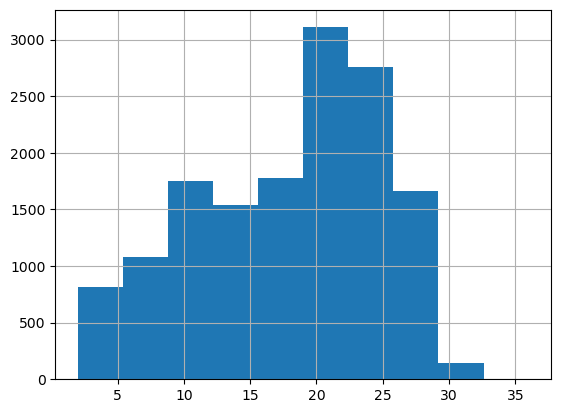

In [136]:
# YOUR CODE HERE

df['word_count'].hist()


### 3.3 Linear Regression of Tweet Length

Let's use a linear regression to look at other predictors of tweet length. Complete the steps:

1. Select the numeric columns 'airline_sentiment','airline_sentiment_confidence','retweet_count','mentions', and save it as `X` (except wordcount)
2. Select the word_count column and save as `y`
3. Set up a linear regression and fit it to the data using `sm.OLS()`
4. Interpret the model summary

In [137]:
pos_neg_df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,retweet_count,text,airline,word_count,mentions
0,0,0.6469,NaN,NaN,jaxbra,0,@JetBlue Yesterday on my way from EWR to FLL j...,Delta,15,1
3,1,1.0000,Flight Attendant Complaints,0.6522,Oneladyyouadore,0,"@JetBlue They weren't on any flight, they just...",Delta,17,1
4,1,1.0000,Bad Flight,1.0000,Oneladyyouadore,0,@JetBlue everyone is here but our pilots are n...,Delta,30,1
7,1,1.0000,Flight Booking Problems,0.6921,heyheyman,0,"@JetBlue Hey guys, why did my last flight earn...",Delta,13,1
8,1,1.0000,Can't Tell,1.0000,erinkphares,0,@JetBlue 2 aisles of empty #evermoreroom seats...,Delta,20,1
...,...,...,...,...,...,...,...,...,...,...
14633,1,1.0000,Cancelled Flight,1.0000,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,American,21,1
14634,1,0.6684,Late Flight,0.6684,GolfWithWoody,0,@AmericanAir right on cue with the delays👌,American,7,1
14635,0,0.3487,NaN,0.0000,KristenReenders,0,@AmericanAir thank you we got on a different f...,American,11,1
14636,1,1.0000,Customer Service Issue,1.0000,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,American,23,1


In [138]:
# YOUR CODE HERE
X = np.array(pos_neg_df[['airline_sentiment','airline_sentiment_confidence','retweet_count','mentions']],dtype=float)
y = np.array(pos_neg_df['word_count'],dtype=float)

model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                          2.492e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:21:04   Log-Likelihood:                         -37772.
No. Observations:               11541   AIC:                                  7.555e+04
Df Residuals:                   11537   BIC:                                  7.558e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.0285      0.148     40.798      0.000       5.739       6.318
x2            12.3834      0.212     58.290      0.000      11.967      12.800
x3             0.1254      0.077      1.619      0.106      -0.026       0.277
x4             2.0113      0.138     14.524      0.000       1.740       2.283
==============================================================================
Omnibus:                      152.860   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.221
Skew:                          -0.265   Prob(JB):                     5.35e-34
Kurtosis:                       2.805   Cond. No.                         7.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Writing Files

Finally, a `pd.DataFrame` can be exported to a `.csv` (or other filetype) using `df.to_csv()`. This is a method function built-in to every data frame.

🔔 **Question**:  Where does `airlines_sentiment.csv` get saved? What if you wanted to save it to the "data" directory?

In [139]:
pos_neg_df.to_csv('../../data/airlines_sentiment.csv') 

## 🥊 Take-home challenge: Are Negative Tweets Longer than Positive Tweets?

For those who want some more practive after the workshop, here's a challenge.

Take a look at the negative and positive tweets. We are interested in the whether negative tweets are longer or shorter than positive tweets. Let's test this with a t-test.

1. Subset the data into positive and negative tweets.
2. Select the `word_count` column.
3. Calculate the mean word count for each column. Which mean is higher?
3. Use a t-test to compare the two sets of values from (2). What is the p-value of the result? 
4. Plot a histogram layer for both positive and negative tweet word counts. What do you notice about the distribution?

💡 **Tip**: Refer to the [first section](#stats) of this notebook for an example!

mean length of positive tweets is  19.84451950315973
mean length of negative tweets is  14.138383410918324
t-score: 39.63668145325772
p-value: 0.0
Degrees of Freedom: 11539.0


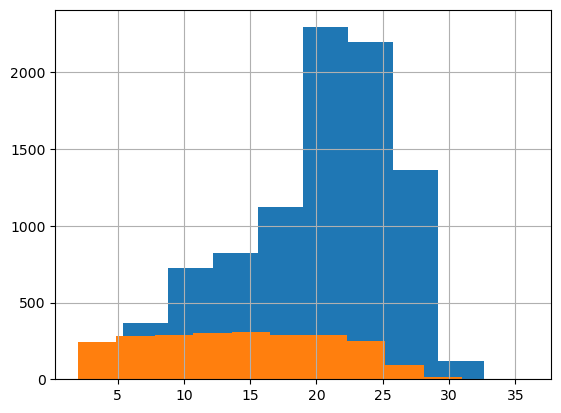

In [141]:
# Subset dataframe
pos = pos_neg_df.loc[pos_neg_df['airline_sentiment'] == 1]
neg = pos_neg_df.loc[pos_neg_df['airline_sentiment'] == 0]

# Calculate mean
print('mean length of positive tweets is ', pos.loc[:,'word_count'].mean())
print('mean length of negative tweets is ', neg.loc[:,'word_count'].mean())

# Run t-test
res = sm.stats.ttest_ind(pos['word_count'], neg['word_count'])
print('t-score:', res[0])
print('p-value:', res[1])
print('Degrees of Freedom:', res[2])

# Plot (kind = 'hist')
pos.loc[:,'word_count'].hist();
neg.loc[:,'word_count'].hist();

# 🎉 Well done!

**This concludes Python Fundamentals II!**

Today's project took us through importing multiple csv files, data manipulation, and some basic visualizations and analysis of data. 

If you were working on this dataset, what would you potentially do next? It could be either an analysis, a new feature to include, a visualization that might help represent the data, etc.

### 💡 Tip: More workshops!

D-Lab teaches workshops that allow you to practice more with DataFrames and visualization.

- To learn more about data wrangling, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).
- To learn more about data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).